In [379]:
import torch 
import matplotlib.pyplot as plt


def newton(f, x_o, iters=100):
    x = x_o 
    for i in range(iters):
        x_help = x.clone().requires_grad_(True)
        y = f(x_help)
        dfdx = torch.autograd.grad(y.sum(), x_help)[0]
        x = x - y.detach()/dfdx 
    return x

def batch_jacobian(func, x, create_graph=False):
  # x in shape (Batch, Length)
  def _func_sum(x):
    return func(x).sum(dim=0)
  return torch.autograd.functional.jacobian(_func_sum, x, create_graph=create_graph).permute(1,0,2)

def newton_multivariate(f, x_o, iters=100):
    x = x_o 
    d = x_o.shape[-1]
    assert d > 1, "Must be multivariate"
    for i in range(iters):
        x_help = x.clone().requires_grad_(True)
        jacs = batch_jacobian(f, x_help)
        invjacs = torch.inverse(jacs)
        x = x - (invjacs@f(x).unsqueeze(-1)).squeeze()
    return x

def gd(f, x_o, iters=100):
  x = x_o 
  for i in range(iters):
      x_help = x.clone().requires_grad_(True)
      y = f(x_help)
      dfdx = torch.autograd.grad(y.sum(), x_help)[0]
      x = x - 0.01*dfdx
  return x



In [317]:
f1 = lambda x: (x-3)*x*(x+3)
x_o = torch.rand(100000, 1)*10-5
x = torch.linspace(-5,5,1000)
out = newton(f1, x_o, iters=1000)

In [271]:
mask = torch.isfinite(out)
x_o = x_o[mask]
out = out[mask]


(-20.0, 20.0)

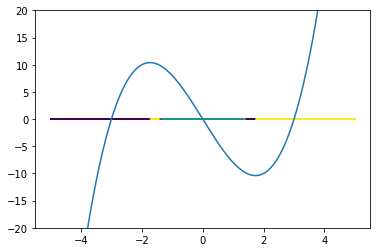

In [275]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [281]:
x_o = torch.rand(100000, 1)*0.1 -1.4
x = torch.linspace(-1.4,-1.3,1000)
out = newton(f1, x_o, iters=1000)

(-20.0, 20.0)

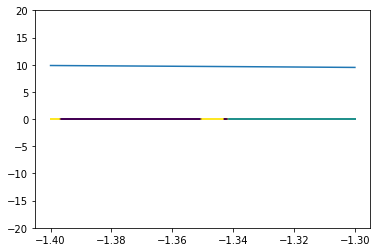

In [282]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [285]:
x_o = torch.rand(100000, 1)*0.01 -1.35
x = torch.linspace(-1.35,-1.34,1000)
out = newton(f1, x_o, iters=1000)

(-20.0, 20.0)

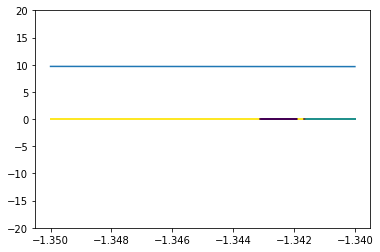

In [286]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [307]:
x_o = torch.rand(100000, 1)*0.002 -1.343
x = torch.linspace(-1.343,-1.341,1000)
out = newton(f1, x_o, iters=1000)

(-20.0, 20.0)

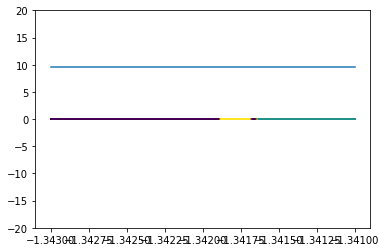

In [308]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [ ]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [ ]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [386]:
f1 = lambda x: (x-3)*x*(x+3)*x
x_o = torch.rand(100000, 1)*10-5
x = torch.linspace(-5,5,1000)
out = gd(f1, x_o, iters=1000)

(-20.0, 20.0)

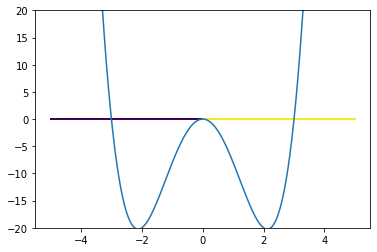

In [388]:
plt.plot(x, f1(x))
plt.scatter(x_o, torch.zeros_like(x_o), c=out, alpha=0.1, s=2, marker="|")
plt.ylim(-20,20)

In [371]:
f2 = lambda x: (x-3)*x*(x+3)
x_o = torch.rand(100000, 2)*20-10
out = newton_multivariate(f2, x_o, iters=1000)

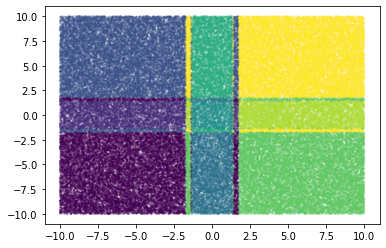

In [372]:
plt.scatter(x_o[:,0], x_o[:,1], c=out.unique(dim=0, return_inverse=True)[1], alpha=0.2, s=2)

(tensor([[-3., -3.],
         [-3.,  0.],
         [-3.,  3.],
         [ 0., -3.],
         [ 0.,  0.],
         [ 0.,  3.],
         [ 3., -3.],
         [ 3.,  0.],
         [ 3.,  3.]]),
 tensor([2, 2, 0,  ..., 8, 6, 8]))